In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
x = airline.drop(['ID#'], axis=1)
x.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

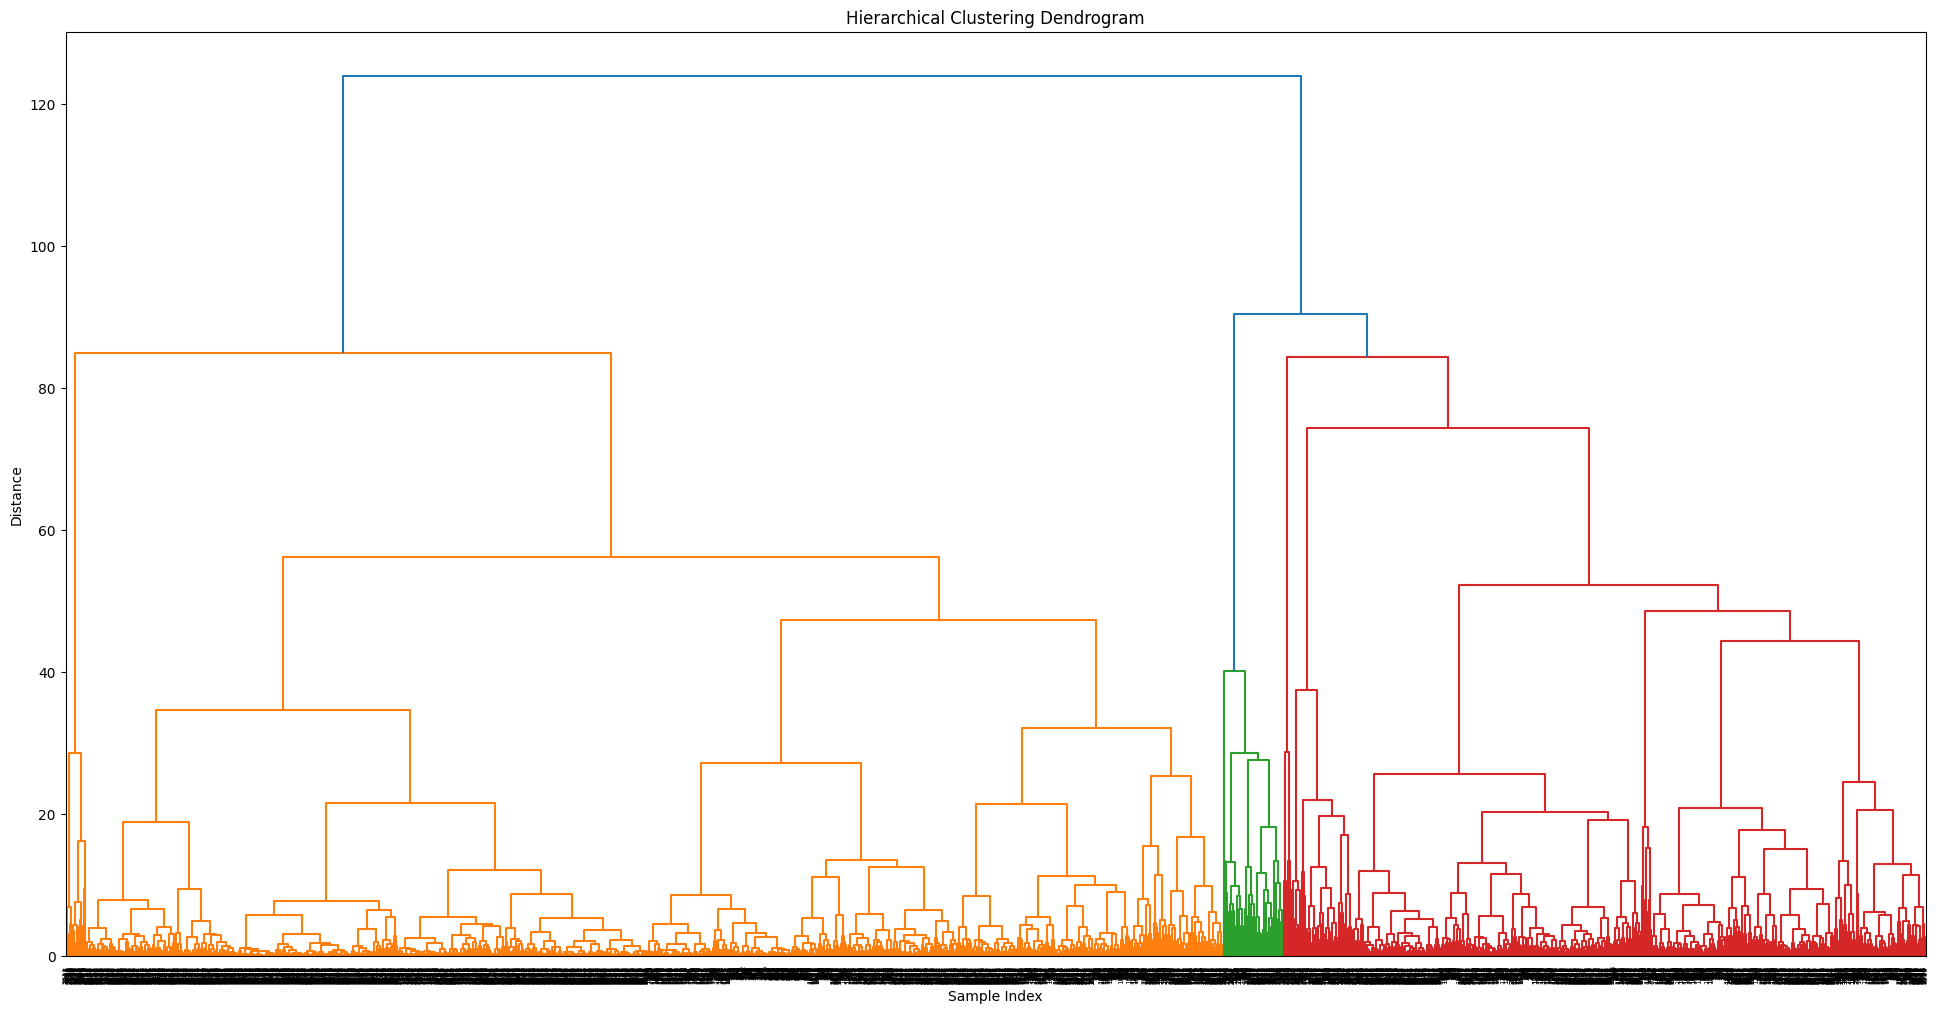

In [10]:
z = linkage(x, method='ward') 
plt.figure(figsize=(24,12))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


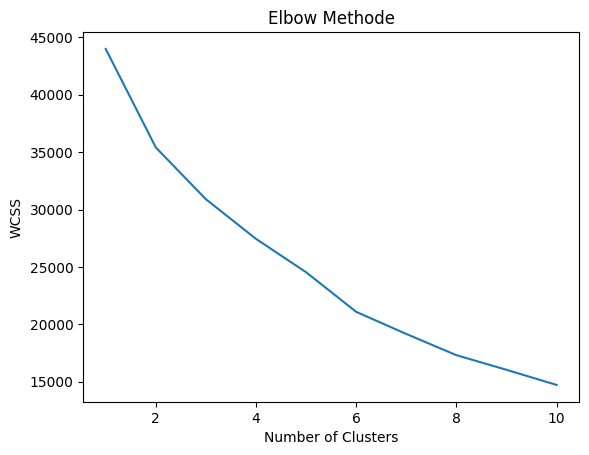

In [11]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Methode")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [12]:
# check the validity of k = 6

In [13]:
clusterer = KMeans(n_clusters=6,random_state=10)
cluster_labels = clusterer.fit_predict(x)
print(cluster_labels)

[0 0 0 ... 1 0 0]


In [14]:
airline=airline.copy()
airline['clusters']=cluster_labels
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
clusterer.cluster_centers_

array([[-0.30012173, -0.0932956 , -0.54565554, -0.09824189, -0.06029908,
        -0.51317985, -0.4650884 , -0.21960096, -0.24113111, -0.24080932,
        -0.7669193 ],
       [-0.15483578,  0.12299387, -0.26644831, -0.09824189, -0.06276658,
        -0.26879347, -0.10662224, -0.0288832 , -0.02808561,  0.05616843,
         1.29381651],
       [ 0.63290825, -0.01714944,  1.48588649, -0.09824189, -0.05142102,
         1.26606553,  0.83800632, -0.06946782, -0.06988857,  0.45939694,
         0.44164254],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 1.20367872,  0.81899485,  0.16137695, -0.09824189, -0.06276658,
         0.69852867,  1.71793835,  3.78902283,  4.05885514,  0.27143994,
         0.88100065],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.337

In [16]:
airline.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2279.480964,43355.506024,71.978795,1.307470,1.000000,1.000482,4746.666024,7.132530,152.680482,0.459277,3619.093494,0.000000
1,1,1960.164634,57999.600000,239.258537,1.692683,1.000000,1.000000,10654.035366,10.578049,419.618293,1.267073,4234.540244,0.995122
2,2,1493.766593,137281.744469,130.703540,4.103982,1.000000,1.002212,47683.837389,19.642699,362.397124,1.107301,5070.663717,0.582965
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,1740.028169,194887.683099,777.661972,2.281690,1.000000,1.000000,34012.880282,28.098592,5764.816901,16.767606,4679.049296,0.795775
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


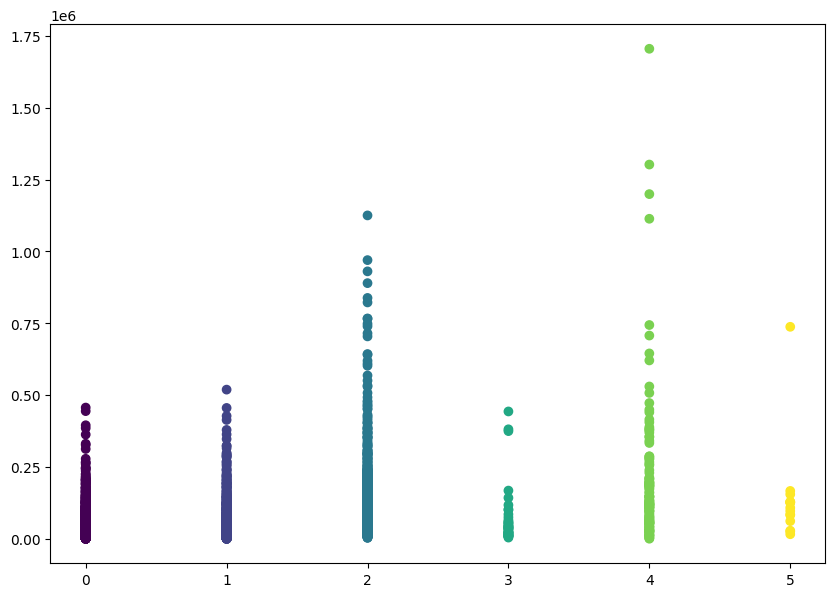

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusters'],airline['Balance'], c=cluster_labels) 

In [18]:
# check the validity of k = 8

In [19]:
clusterer8 = KMeans(n_clusters=8,random_state=10)
cluster8_labels = clusterer8.fit_predict(x)
print(cluster8_labels)

[0 0 0 ... 3 0 0]


In [20]:

airline=airline.copy()
airline['clusters8']=cluster8_labels
clusterer8.cluster_centers_

array([[-3.82429214e-01, -1.43655679e-01, -7.39534740e-01,
        -9.82418871e-02, -6.27665798e-02, -6.10411418e-01,
        -7.06451092e-01, -2.14863849e-01, -2.36750796e-01,
        -3.08070518e-01, -7.66919299e-01],
       [ 7.68115306e-01, -7.69276243e-02,  1.66325582e+00,
        -9.82418871e-02, -5.39498475e-02,  1.63717986e+00,
         9.55580726e-01,  7.52329990e-03,  2.62948586e-02,
         5.00853905e-01,  1.00808424e+00],
       [ 1.02327645e+00,  4.34954035e-01,  1.14928189e-01,
        -9.82418871e-02, -6.27665798e-02,  6.77910426e-01,
         1.77737670e+00,  4.04826597e+00,  4.29448810e+00,
         2.51251617e-01,  8.53010003e-01],
       [-1.52979371e-01, -6.30636979e-02, -2.24816066e-01,
        -9.82418871e-02, -6.27665798e-02, -2.50450889e-01,
        -8.78393540e-02, -3.48853075e-02, -3.22702919e-02,
         6.61252050e-02,  1.30391816e+00],
       [ 4.25464160e-01,  7.09987688e+00,  9.59681956e-03,
        -9.82418871e-02, -6.27665798e-02,  1.10131291e-01,
  

In [21]:
airline.groupby('clusters').agg(['mean']).reset_index()



,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters8
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2279.480964,43355.506024,71.978795,1.307470,1.000000,1.000482,4746.666024,7.132530,152.680482,0.459277,3619.093494,0.000000,1.030843
1,1,1960.164634,57999.600000,239.258537,1.692683,1.000000,1.000000,10654.035366,10.578049,419.618293,1.267073,4234.540244,0.995122,3.023171
2,2,1493.766593,137281.744469,130.703540,4.103982,1.000000,1.002212,47683.837389,19.642699,362.397124,1.107301,5070.663717,0.582965,2.378319
3,3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,6.000000
4,4,1740.028169,194887.683099,777.661972,2.281690,1.000000,1.000000,34012.880282,28.098592,5764.816901,16.767606,4679.049296,0.795775,2.126761
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,7.000000


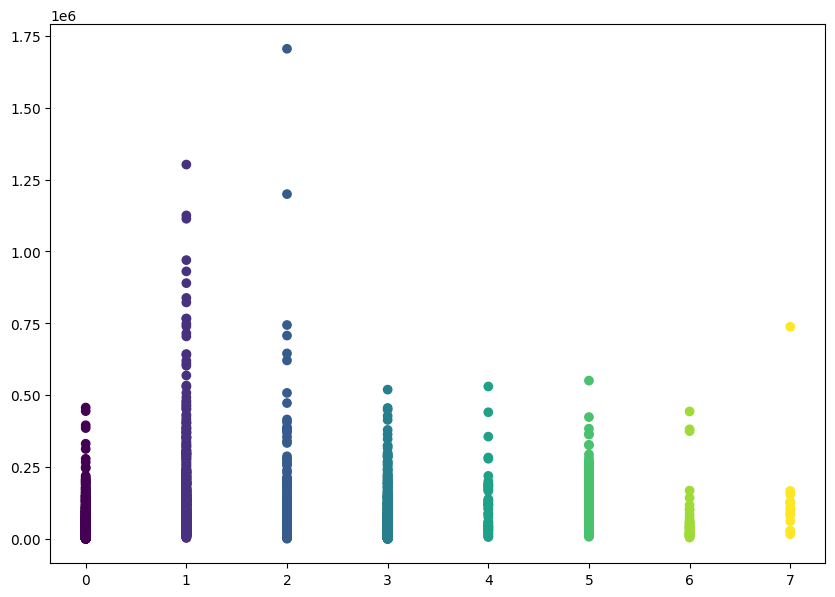

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusters8'],airline['Balance'], c=cluster8_labels) 